In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly as py
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import random as rd

# LAST DAY OF DATA

In [19]:
last_date=dt.date(2020,3,19)

# Data Import

In [24]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataRegions = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-"+day+".csv")
    DataRegions = DataRegions.append(df)
#print(df)

HTTPError: HTTP Error 404: Not Found

In [ ]:
DataRegions.head()

#### Consider first column as datatime

In [21]:
DataRegions['data'] =  pd.to_datetime(DataRegions['data'])

In [22]:
#DataRegions.info()

In [23]:
daterange = pd.date_range(dt.date(2020,2,24),last_date)
DataProvinces = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%Y%m%d")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-"+day+".csv")
    DataProvinces = DataProvinces.append(df)
#print(df)

HTTPError: HTTP Error 404: Not Found

In [25]:
DataProvinces['data'] =  pd.to_datetime(DataProvinces['data'])

In [26]:
DataProvinces.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0.0
1,2020-02-24 18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0.0
2,2020-02-24 18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0.0
3,2020-02-24 18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0.0
4,2020-02-24 18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0.0


In [27]:
daterange = pd.date_range(dt.date(2020,1,22),last_date)
DataWorld = pd.DataFrame()

for single_date in daterange:
    day=single_date.strftime("%m-%d-%Y")
    #print(day)
    df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/"+day+".csv",error_bad_lines = False)
    df['Date']=single_date
    DataWorld = DataWorld.append(df)
#print(df)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




HTTPError: HTTP Error 404: Not Found

In [31]:
DataWorld['Last Update'] =  pd.to_datetime(DataWorld['Last Update'])

In [ ]:
DataWorld.head()

# Temporal Analysis

## Regioni

<IPython.core.display.Javascript object>


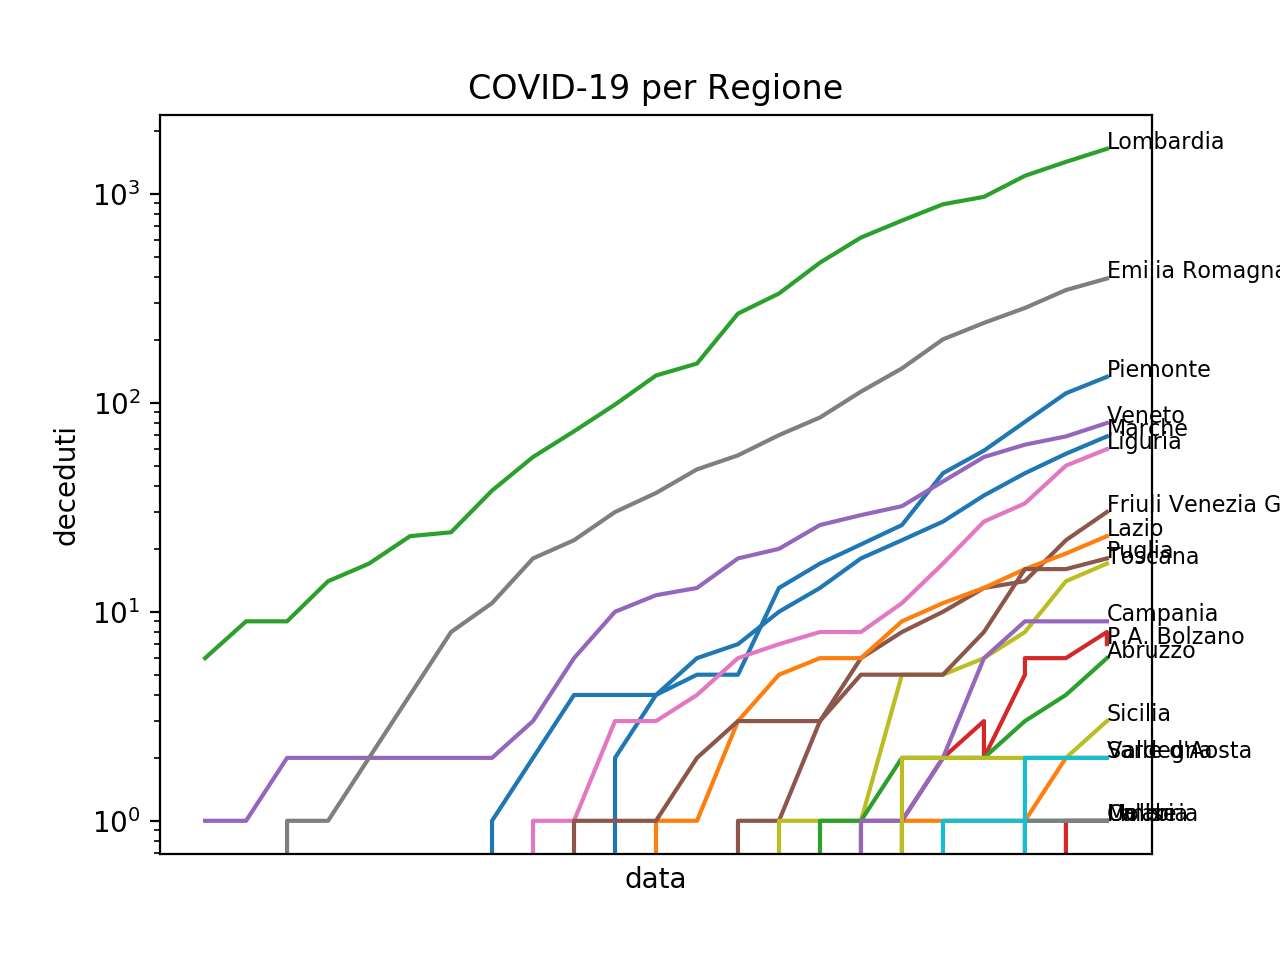

In [28]:
ObsX='data'
ObsY='deceduti' 

#'ricoverati_con_sintomi'
#'terapia_intensiva'
#'totale_ospedalizzati'
#'isolamento_domiciliare'
#'totale_attualmente_positivi'
#'nuovi_attualmente_positivi'
#'dimessi_guariti'
#'deceduti'
#'totale_casi'
#'tamponi'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

plt.figure(num='ITALY')
plt.title("COVID-19 per Regione")

if ObsX=='data':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

for r in range(1,21):
    Reg=DataRegions.loc[DataRegions['codice_regione'] == r]
   
    plt.plot(Reg[ObsX],Reg[ObsY])
    plt.text(Reg[ObsX].iloc[-1],Reg[ObsY].iloc[-1],Reg['denominazione_regione'].iloc[0],fontsize=size_lab)

## Province

<IPython.core.display.Javascript object>


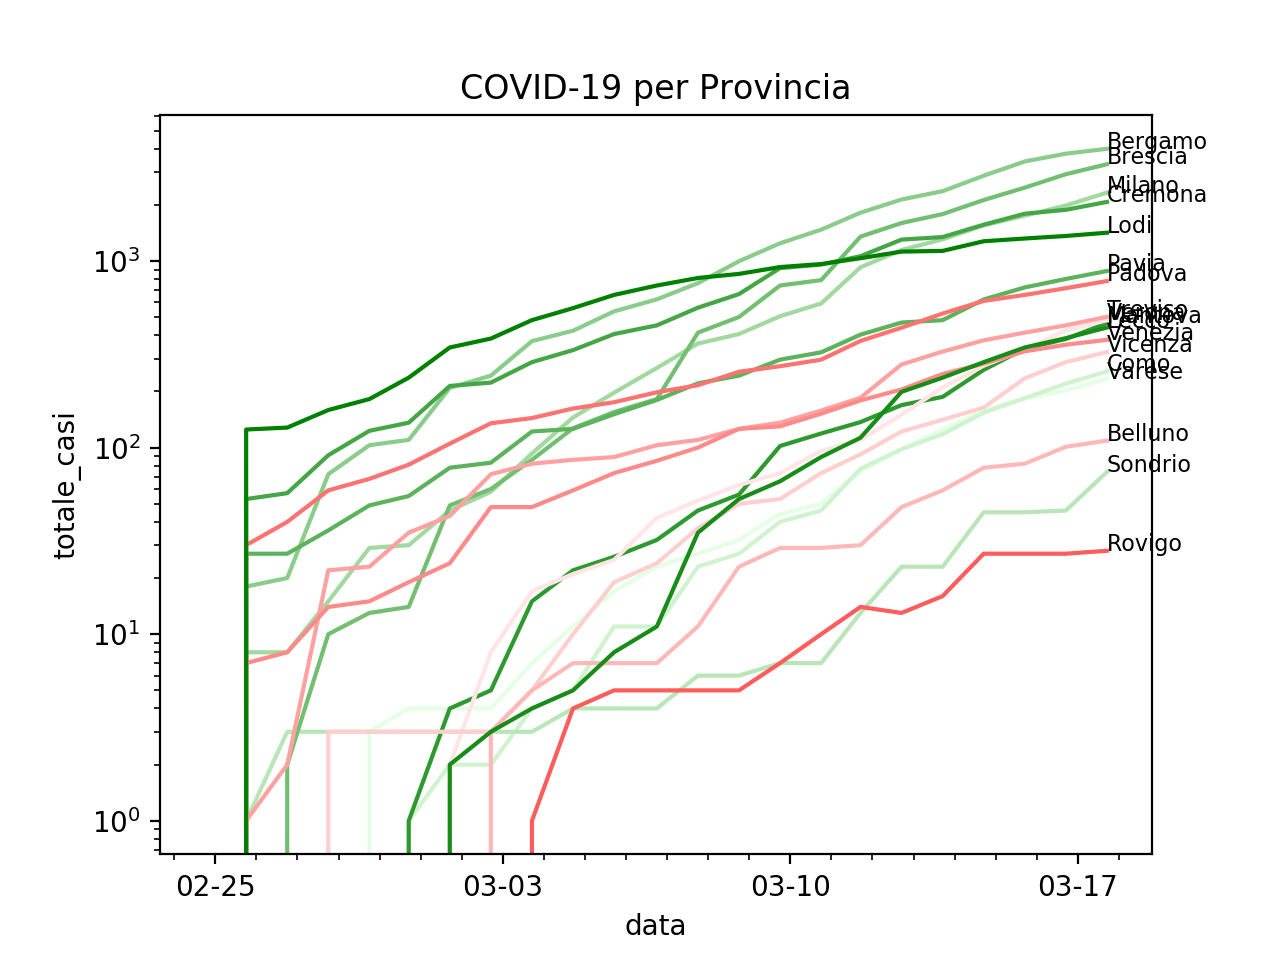

In [29]:
ObsX='data'
ObsY='totale_casi'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

plt.figure(num='ITALY')
plt.title("COVID-19 per Provincia")

if ObsX=='data':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

cV=0;cL=0;cE=0;cLa=0;

for p in range(1,103):
    Prv=DataProvinces.loc[DataProvinces['codice_provincia'] == p]
    
    pal=sns.light_palette("red",11)
    if Prv['denominazione_regione'].iloc[0]=='Veneto':
        plt.plot(Prv[ObsX],Prv[ObsY],c=pal[cV])
        plt.text(Prv[ObsX].iloc[-1],Prv[ObsY].iloc[-1],Prv['denominazione_provincia'].iloc[0],fontsize=size_lab)
        cV+=1
        
    pal=sns.light_palette("green",11)
    if Prv['denominazione_regione'].iloc[0]=='Lombardia':
        plt.plot(Prv[ObsX],Prv[ObsY],c=pal[cL])
        plt.text(Prv[ObsX].iloc[-1],Prv[ObsY].iloc[-1],Prv['denominazione_provincia'].iloc[0],fontsize=size_lab)
        cL+=1

## World

<IPython.core.display.Javascript object>


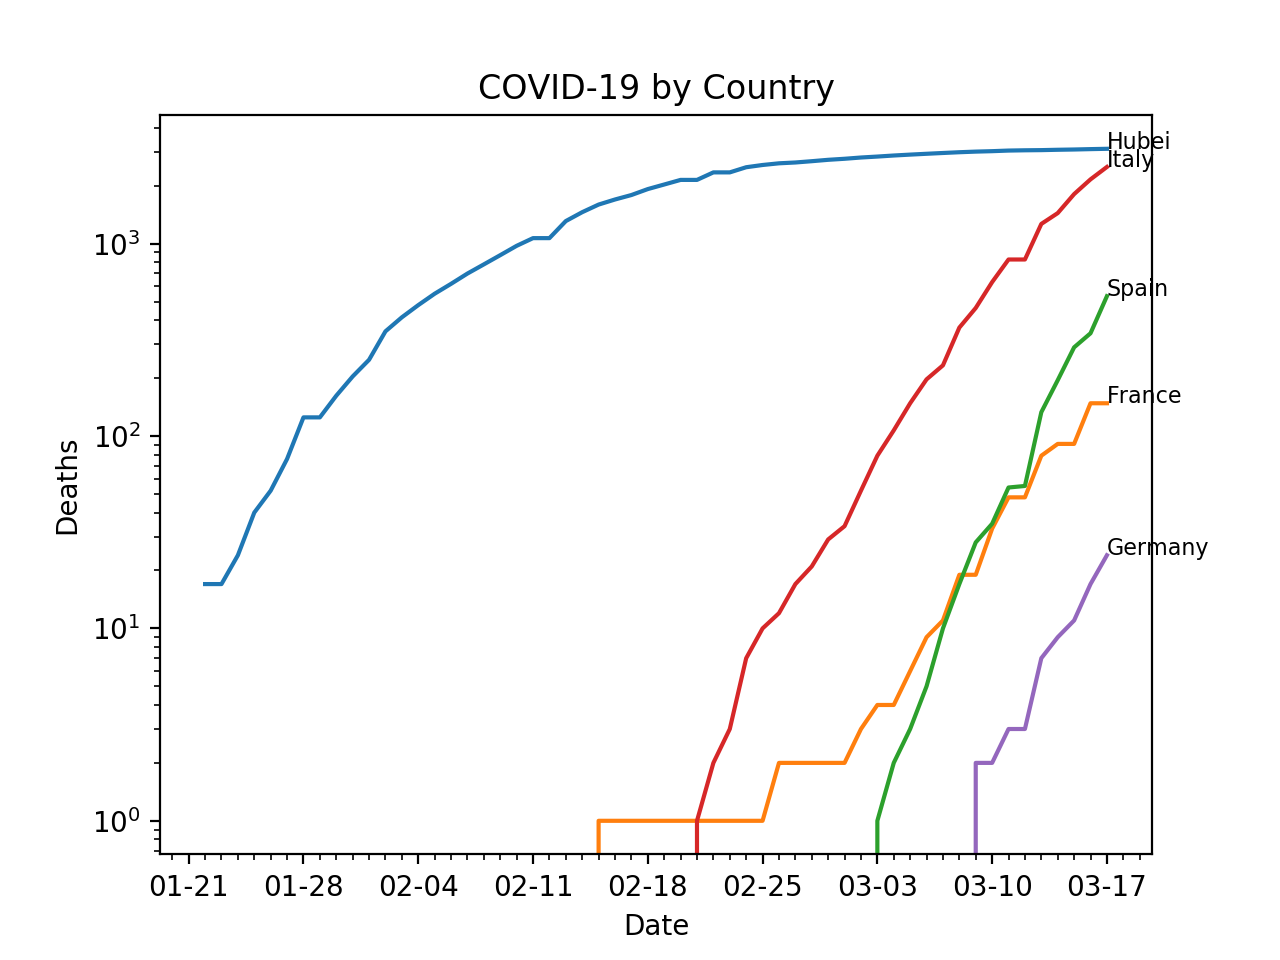

In [32]:
ObsX='Date'
ObsY='Deaths'

scaleX='log'
scaleY='log'

size_lab=8

%matplotlib notebook

plt.figure(num='WORLD')
plt.title("COVID-19 by Country")

if ObsX=='Last Update' or ObsX=='Date':
    plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())
else:
    plt.xscale(scaleX)
    
plt.yscale(scaleY)

plt.xlabel(ObsX)
plt.ylabel(ObsY)

state='Hubei'
Cty = DataWorld.loc[DataWorld['Province/State'] == state]
plt.plot(Cty[ObsX],Cty[ObsY])
plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],state,fontsize=size_lab)

state = 'France'
Cty = DataWorld.loc[DataWorld['Country/Region'] == state]
Cty = Cty[(Cty['Province/State']==state) | (Cty['Province/State'].isnull())]
plt.plot(Cty[ObsX],Cty[ObsY])
plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],state,fontsize=size_lab)

for country in ['Spain','Italy','Germany']:
    Cty = DataWorld.loc[DataWorld['Country/Region'] == country]
    plt.plot(Cty[ObsX],Cty[ObsY])
    plt.text(Cty[ObsX].iloc[-1],Cty[ObsY].iloc[-1],country,fontsize=size_lab)


In [ ]:
#DataWorld.loc[DataWorld['Country/Region'] == 'Italy']